<a href="https://colab.research.google.com/github/Sachinsachin21/Deep_learning/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [55]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [56]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [57]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [58]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [59]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [60]:
classes[7]

'horse'

In [61]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

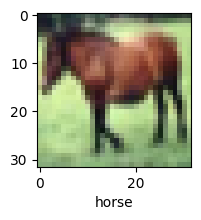

In [62]:
plot_sample(X_train, y_train, 7)

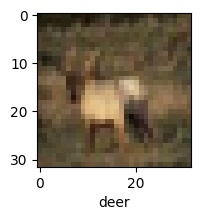

In [63]:
plot_sample(X_train, y_train, 3)

In [64]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [81]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.8118 - accuracy: 0.3556
Epoch 2/10
1563/1563 [==============================] - 140s 90ms/step - loss: 1.6244 - accuracy: 0.4251
Epoch 3/10
1563/1563 [==============================] - 141s 90ms/step - loss: 1.5426 - accuracy: 0.4585
Epoch 4/10
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4805 - accuracy: 0.4791
Epoch 5/10
1563/1563 [==============================] - 149s 96ms/step - loss: 1.4322 - accuracy: 0.4972
Epoch 6/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.3884 - accuracy: 0.5126
Epoch 7/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.3492 - accuracy: 0.5262
Epoch 8/10
1563/1563 [==============================] - 143s 92ms/step - loss: 1.3146 - accuracy: 0.5395
Epoch 9/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.2832 - accuracy: 0.5497
Epoch 10/10
1563/1563 [==============================] 

In [82]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.3957 - accuracy: 0.5071


[1.3957270383834839, 0.507099986076355]

In [83]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.53      0.58      1000
           1       0.77      0.50      0.60      1000
           2       0.43      0.35      0.39      1000
           3       0.44      0.23      0.30      1000
           4       0.35      0.61      0.45      1000
           5       0.35      0.56      0.43      1000
           6       0.64      0.47      0.54      1000
           7       0.53      0.58      0.56      1000
           8       0.63      0.65      0.64      1000
           9       0.60      0.58      0.59      1000

    accuracy                           0.51     10000
   macro avg       0.54      0.51      0.51     10000
weighted avg       0.54      0.51      0.51     10000



In [84]:
ann.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_13 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_14 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_15 (Dense)            (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [86]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4812 - accuracy: 0.4754
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1825 - accuracy: 0.5890
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0696 - accuracy: 0.6288
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9897 - accuracy: 0.6575
Epoch 5/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9306 - accuracy: 0.6775
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8839 - accuracy: 0.6941
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8440 - accuracy: 0.7070
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8072 - accuracy: 0.7218
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7705 - accuracy: 0.7329
Epoch 10/10
1563/1563 [==============================] - 37s 23m

In [97]:
y_test = y_test.reshape(-1,)
y_test[:5]
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.0619 - accuracy: 0.6428


[1.0618574619293213, 0.642799973487854]

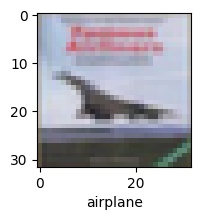

In [90]:
plot_sample(X_test, y_test,3)

In [91]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[9.4133080e-04, 9.1322572e-06, 8.9148321e-04, 9.4277060e-01,
        1.1270677e-03, 4.3307215e-02, 4.5370287e-03, 2.2081987e-03,
        3.6619245e-03, 5.4608297e-04],
       [2.1126444e-02, 1.9148381e-01, 9.5874333e-05, 2.2608947e-05,
        9.1134913e-05, 6.8701564e-07, 4.7374343e-08, 2.7819544e-06,
        7.6692086e-01, 2.0255700e-02],
       [2.8167459e-01, 1.1281190e-01, 4.0142573e-02, 6.3429982e-03,
        3.6034777e-03, 5.1891815e-04, 2.9494066e-05, 7.0263403e-03,
        4.7207364e-01, 7.5776033e-02],
       [2.9811609e-01, 1.1133333e-02, 2.2745009e-01, 4.3333815e-03,
        3.0888611e-02, 5.1777600e-04, 3.7116978e-02, 6.1823486e-04,
        3.8808748e-01, 1.7380313e-03],
       [3.7485398e-07, 9.6392250e-05, 5.2418034e-03, 4.3816146e-02,
        7.9389608e-01, 2.8885454e-03, 1.5400016e-01, 1.0658904e-05,
        3.1188065e-05, 1.8577657e-05]], dtype=float32)

In [92]:
y_class = [np.argmax(element) for element in y_pred]
y_class[:5]

[3, 8, 8, 8, 4]

In [93]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

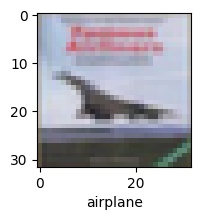

In [94]:
plot_sample(X_test, y_test,3)

In [95]:
classes[y_class[3]]

'ship'

In [96]:
print("Classification Report: \n", classification_report(y_test, y_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.57      0.65      1000
           1       0.78      0.76      0.77      1000
           2       0.48      0.54      0.51      1000
           3       0.47      0.43      0.45      1000
           4       0.62      0.52      0.57      1000
           5       0.54      0.58      0.56      1000
           6       0.65      0.80      0.72      1000
           7       0.72      0.70      0.71      1000
           8       0.69      0.81      0.75      1000
           9       0.75      0.70      0.72      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000

